In [98]:
import numpy
import numpy.matlib
import matplotlib.pyplot
%matplotlib inline
import random
import matplotlib.cm as cm

In [99]:
Xbad = numpy.matrix(numpy.loadtxt("q1/Xbad.csv", delimiter=","))
# now X is the data matrix and each row of X corresponds to one data point
MuGood = numpy.matrix(numpy.loadtxt("q1/Mu.csv", delimiter=","))
# Mu is the mean vector of all the smilie faces (in vector format)
WGood = numpy.matrix(numpy.loadtxt("q1/W.csv", delimiter=","))
Y1Good = numpy.matrix(numpy.loadtxt("q1/Y1.csv", delimiter=","))
#already good ones Y1, W, and Mu

In [126]:
#Sigma = numpy.matrix(numpy.linalg.svd(Xbad.T))
# Numpy does the covariance calculation for you using function cov
#Wbad = numpy.linalg.eig(Sigma)[1][:,:20]

LinAlgError: Last 2 dimensions of the array must be square

In [102]:
#Wbad = numpy.linalg.svd(Xbad)[2].T[:,:20]

In [103]:
onecolmu = numpy.mean(Xbad,0) #IS THIS RIGHT

In [104]:
allcolmu = numpy.matlib.repmat(onecolmu,28,1) #IS THIS RIGHT

In [105]:
YBad = (Xbad-allcolmu)*Wbad
# Here is the line that does the linear projection to lower dimension
# We are doing all the 28 ones in a batch and repmat repeats the single
# mean vector 28 times

In [106]:
YBad.shape

(28, 20)

In [107]:
Y1Bad = YBad[0]

In [108]:
Y1Bad.shape

(1, 20)

#HELP

In [129]:
YBad

matrix([[  2.46920388e+02,   1.24058115e+03,   5.71756937e+02,
          -1.28485634e+03,   1.13576028e+03,  -7.51556496e+02,
           2.85075120e+02,   8.36405250e+02,   6.85665246e+01,
          -1.72043840e+02,  -3.25091657e+02,   1.94436941e+02,
           7.01293268e+01,   7.15825526e+02,  -2.09226588e+02,
          -1.09098255e+03,  -1.74587142e+03,  -2.11553181e+02,
          -3.23326943e+01,  -7.52529323e+02],
        [ -3.56196759e+02,   1.12244529e+03,  -2.30260681e+02,
           6.78482822e+02,  -1.10487547e+03,  -4.32668923e+02,
           5.40814288e+02,   4.03577857e+01,   1.99153947e+02,
           1.40928098e+02,  -2.93374897e+02,   9.85082900e+01,
           4.88817076e+02,  -6.40293645e+02,  -4.97177604e+02,
           8.62717301e+02,   9.44227723e+02,   8.15028818e+02,
          -1.15177722e+03,  -3.44840952e+02],
        [ -3.53817241e+02,   1.30085677e+03,  -4.55062806e+01,
           1.74410858e+02,  -1.23806887e+03,  -2.53248472e+02,
           5.55233873e+02,

In [132]:
for j in range(0,20):
    if (Y1Good[0,j] < 0 and Y1Bad[0,j] >0) or (Y1Good[0,j] > 0 and Y1Bad[0,j] <0):
        YBad[:,j] *= -1
        

In [133]:
#Image reconstruction
#Lets see how the reconstrcuted image looks like

Xhat = YBad*numpy.transpose(WGood) + MuGood

In [134]:
Ximage2 = numpy.empty((105,105,28))

In [135]:
# Xhat is the vectorized version, let us put vectors back into images

for t in range(0,28):
    for n in range(0,105):
        for m in range(0, 105):
            #Ihat(n,m,t) = Xhat(t,(m-1)*105+ n)
            Ximage2[n,m,t] = Xhat[t,m*105+n-1]

            
            


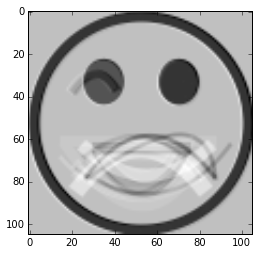

In [136]:

matplotlib.pyplot.imshow(Ximagebad[:,:,8],cmap=cm.Greys_r)
# Play around with K to see the difference